<a href="https://colab.research.google.com/github/Soumyajit567/Twitter_Analysis_for_Class_Imbalance/blob/master/Decision_Tree_Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tweepy

In [5]:
!pip install textblob

In [6]:
import tweepy
from textblob import TextBlob
consumer_key = 'HOXs6dN9UApOrjdP3sDG8q7Bx'
consumer_secret = 'TzR3sATRX2FwL61Qhro1d4KenvLhKuCvYNS5OKzmxeK7HRkRg2'
access_token = '1301245220416188416-DvgyzLiFkYDfdozX0Afl2WR8eItktR'
access_token_secret = 'ZjeOuGzFw440IkvbPlKUKshONinTU136UVU9twyG5cUhJ'
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)
public_tweets = api.search('Coronavirus')
for tweets in public_tweets:
    print(tweets.text)
    analysis = TextBlob(tweets.text)
    print(analysis.sentiment)

RT @Ofdachurch_II: Ojalá tuvierais un cuartito de la exigencia que tenéis con Fernando Simón para con vosotros mismos.

Habríamos superado…
Sentiment(polarity=0.0, subjectivity=0.0)
@RebeccaFront @NicolaKSDavis Coronavirus or Covid-19 which is it?
Sentiment(polarity=0.0, subjectivity=0.0)
RT @InfoVeryfiable: Le professeur #Raoult avait donc RAISON depuis le début:
"#Gilead renonce au remboursement de son antiviral contre le C…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @swamp_nugget: Nashville Mayor (Democrat) Hiding Coronavirus Data Is “Lack Of Leadership Problem” (I Say Criminal) Nashville Council Mem…
Sentiment(polarity=-0.4, subjectivity=0.55)
RT @Bindlestaff: @realDonaldTrump Your actual beef with the FBI, CIA, NSA, and DOJ is that they've already found and revealed *your* real f…
Sentiment(polarity=0.1, subjectivity=0.2)
RT @News18TamilNadu: கொரோனா தொற்றால் தமிழகத்தில் இதுவரை 63 மருத்துவர்கள் உயிரிழப்பு: ஐஎம்ஏ

#Covid19 | #CoronaVirus

Click... https://t.co/…
Sentiment(polarity

In [7]:
def get_tweet_sentiment(self, tweet):
   # create TextBlob object of passed tweet text
   analysis = TextBlob(self.trim_tweet(tweet))
   # set sentiment
   if analysis.sentiment.polarity > 0:
      return 'positive'
   elif analysis.sentiment.polarity == 0:
      return 'neutral'
   else:
      return 'negative'
get_tweet_sentiment      


<function __main__.get_tweet_sentiment>

In [8]:
!pip install matplotlib

In [9]:
matplotlib inline

In [11]:

from plotly import __version__
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [13]:
consumer_key = 'HOXs6dN9UApOrjdP3sDG8q7Bx'
consumer_secret = 'TzR3sATRX2FwL61Qhro1d4KenvLhKuCvYNS5OKzmxeK7HRkRg2'
access_token = '1301245220416188416-DvgyzLiFkYDfdozX0Afl2WR8eItktR'
access_token_secret = 'ZjeOuGzFw440IkvbPlKUKshONinTU136UVU9twyG5cUhJ'

In [14]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [16]:
import tweepy as tw
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
import warnings
warnings.filterwarnings("ignore")


In [17]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
search_term = "#coronavirus+covid+india -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-06-01').items(1000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['India added 96,424 new Covid_19 cases in the last 24 hours.\nTotal confirm cases have reached to 5,214,677 with 84,4… https://t.co/dmMfj4yDb9',
 "India's Covid count crosses 52 lakh, deaths top 84000\n#coronavirus\nhttps://t.co/FMEqBjhBjE \n\n https://t.co/L5FQOnJMyf",
 "India's #COVID19 case tally crosses 52-lakh mark with a spike of 96,424 new cases &amp; 1,174 deaths in last 24 hours.… https://t.co/qgtY9Prtbz",
 'There were no new #coronavirus cases in #NewZealand on Friday for the first time early August, according to the Hea… https://t.co/NElXL9OpqE',
 'The #COVID__19 case fatality rate due to the #coronavirus infection has further #dropped to 1.62 per cent\n#India… https://t.co/LTKSQ77Fap']

In [18]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [19]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['India added 96424 new Covid19 cases in the last 24 hoursTotal confirm cases have reached to 5214677 with 844',
 'Indias Covid count crosses 52 lakh deaths top 84000coronavirus',
 'Indias COVID19 case tally crosses 52lakh mark with a spike of 96424 new cases amp 1174 deaths in last 24 hours',
 'There were no new coronavirus cases in NewZealand on Friday for the first time early August according to the Hea',
 'The COVID19 case fatality rate due to the coronavirus infection has further dropped to 162 per centIndia']

In [20]:
import pandas as pd
# Note how capitalization impacts unique returned values
ex_list = ["coronavirus", "covid 19", "Coronavirus", "COVID 19", "corona", "Corona"]

# Get unique elements in the list
set(ex_list)

{'COVID 19', 'Corona', 'Coronavirus', 'corona', 'coronavirus', 'covid 19'}

In [21]:
# Note how capitalization impacts unique returned values
words_list = ["coronavirus", "covid 19", "Coronavirus", "COVID 19", "corona", "Corona"]

# Make all elements in the list lowercase
lower_case = [word.lower() for word in words_list]

# Get all elements in the list
lower_case

['coronavirus', 'covid 19', 'coronavirus', 'covid 19', 'corona', 'corona']

**Bag of Words**

In [22]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from google.colab import drive
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [23]:
set(lower_case)

{'corona', 'coronavirus', 'covid 19'}

In [24]:
all_tweets_no_urls[0].split()

['India',
 'added',
 '96424',
 'new',
 'Covid19',
 'cases',
 'in',
 'the',
 'last',
 '24',
 'hoursTotal',
 'confirm',
 'cases',
 'have',
 'reached',
 'to',
 '5214677',
 'with',
 '844']

In [25]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['india',
  'added',
  '96424',
  'new',
  'covid19',
  'cases',
  'in',
  'the',
  'last',
  '24',
  'hourstotal',
  'confirm',
  'cases',
  'have',
  'reached',
  'to',
  '5214677',
  'with',
  '844'],
 ['indias',
  'covid',
  'count',
  'crosses',
  '52',
  'lakh',
  'deaths',
  'top',
  '84000coronavirus']]

In [26]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('covid19', 554),
 ('india', 485),
 ('coronavirus', 460),
 ('cases', 413),
 ('in', 410),
 ('the', 409),
 ('of', 371),
 ('to', 300),
 ('covid', 231),
 ('a', 160),
 ('for', 137),
 ('and', 133),
 ('new', 127),
 ('indias', 125),
 ('with', 110)]

In [27]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,covid19,554
1,india,485
2,coronavirus,460
3,cases,413
4,in,410


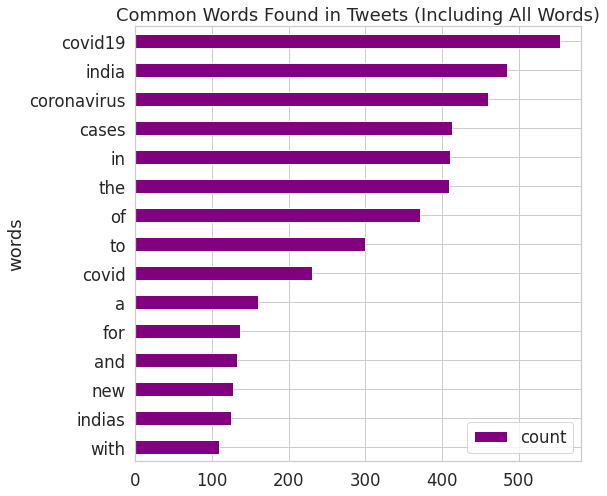

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['ourselves',
 'all',
 'll',
 'ain',
 'was',
 'while',
 'nor',
 'during',
 'on',
 'where']

In [32]:
words_in_tweet[0]

['india',
 'added',
 '96424',
 'new',
 'covid19',
 'cases',
 'in',
 'the',
 'last',
 '24',
 'hourstotal',
 'confirm',
 'cases',
 'have',
 'reached',
 'to',
 '5214677',
 'with',
 '844']

In [33]:
for all_words in words_in_tweet:
    for a_word in all_words:
        # remove stop words
        # Remove stop words from each tweet list of words
     tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['india',
 'added',
 '96424',
 'new',
 'covid19',
 'cases',
 'last',
 '24',
 'hourstotal',
 'confirm',
 'cases',
 'reached',
 '5214677',
 '844']

In [34]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('covid19', 554),
 ('india', 485),
 ('coronavirus', 460),
 ('cases', 413),
 ('covid', 231),
 ('new', 127),
 ('indias', 125),
 ('tally', 103),
 ('vaccine', 90),
 ('deaths', 88),
 ('corona', 80),
 ('lakh', 79),
 ('updates', 75),
 ('million', 75),
 ('china', 63)]

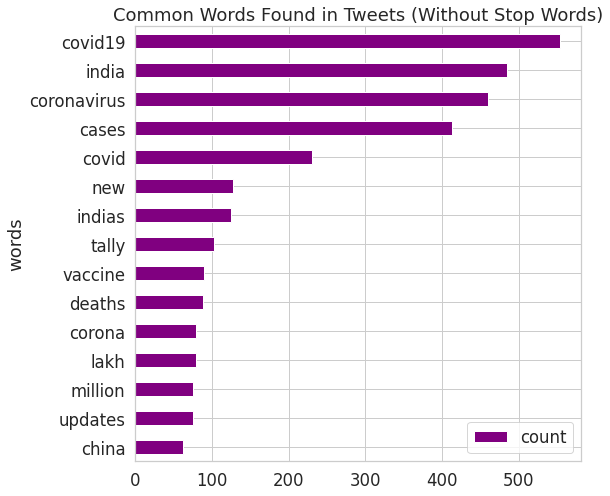

In [35]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [36]:
collection_words = ['covid 19', 'coronavirus', 'india']

In [37]:
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [38]:
tweets_nsw[0]

['india',
 'added',
 '96424',
 'new',
 'covid19',
 'cases',
 'last',
 '24',
 'hourstotal',
 'confirm',
 'cases',
 'reached',
 '5214677',
 '844']

In [39]:
tweets_nsw_nc[0]

['added',
 '96424',
 'new',
 'covid19',
 'cases',
 'last',
 '24',
 'hourstotal',
 'confirm',
 'cases',
 'reached',
 '5214677',
 '844']

In [40]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('covid19', 554),
 ('cases', 413),
 ('covid', 231),
 ('new', 127),
 ('indias', 125),
 ('tally', 103),
 ('vaccine', 90),
 ('deaths', 88),
 ('corona', 80),
 ('lakh', 79),
 ('updates', 75),
 ('million', 75),
 ('china', 63),
 ('19', 60),
 ('crosses', 54)]

In [41]:
len(counts_nsw_nc)

3149

In [42]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,covid19,554
1,cases,413
2,covid,231
3,new,127
4,indias,125


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
clean_tweets_ncw.describe()

,count
count,15.000000
mean,147.800000
std,145.345991
min,54.000000
25%,75.000000
50%,88.000000
75%,126.000000
max,554.000000


In [45]:
clean_tweets_ncw.columns=['covid19','cases']

In [46]:
clean_tweets_ncw.head()

,covid19,cases
0,covid19,554
1,cases,413
2,covid,231
3,new,127
4,indias,125


In [47]:
clean_tweets_ncw.shape

(15, 2)

In [48]:
clean_tweets_ncw.columns

Index(['covid19', 'cases'], dtype='object')

In [49]:
clean_tweets_ncw.dtypes

covid19    object
cases       int64
dtype: object

In [50]:
clean_tweets_ncw.isnull().sum()

covid19    0
cases      0
dtype: int64

In [51]:
tmp=pd.DataFrame(index=clean_tweets_ncw.columns)
tmp['data_types']=clean_tweets_ncw.dtypes
tmp['null_count']=clean_tweets_ncw.isnull().sum()
tmp['unique_count']=clean_tweets_ncw.nunique()
tmp

,data_types,null_count,unique_count
covid19,object,0,15
cases,int64,0,14


In [52]:
clean_tweets_ncw.drop_duplicates()

,covid19,cases
0,covid19,554
1,cases,413
2,covid,231
3,new,127
4,indias,125
5,tally,103
6,vaccine,90
7,deaths,88
8,corona,80
9,lakh,79


In [53]:
clean_tweets_ncw['covid19'].fillna(value=(clean_tweets_ncw['cases'].mean()),inplace=True)

In [54]:
clean_tweets_ncw.isnull().sum()

covid19    0
cases      0
dtype: int64

In [55]:
clean_tweets_ncw=pd.get_dummies(clean_tweets_ncw)

In [56]:
clean_tweets_ncw.head()

,cases,covid19_19,covid19_cases,covid19_china,covid19_corona,covid19_covid,covid19_covid19,covid19_crosses,covid19_deaths,covid19_indias,covid19_lakh,covid19_million,covid19_new,covid19_tally,covid19_updates,covid19_vaccine
0,554,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,413,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,231,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,127,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,125,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [57]:
clean_tweets_ncw.isnull().values.any()

clean_tweets_ncw.shape

(15, 16)

In [58]:
clean_tweets_ncw.head()

,cases,covid19_19,covid19_cases,covid19_china,covid19_corona,covid19_covid,covid19_covid19,covid19_crosses,covid19_deaths,covid19_indias,covid19_lakh,covid19_million,covid19_new,covid19_tally,covid19_updates,covid19_vaccine
0,554,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,413,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,231,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,127,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,125,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


**Bag of words **

We’ll define a collection of strings called a corpus. Then we’ll use the CountVectorizer to create vectors from the corpus. 

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

#corpus = all_tweets_no_urls[:5]
corpus = all_tweets_no_urls[:5]

vectorizer = CountVectorizer()
print( vectorizer.fit_transform(corpus).todense() )
print( vectorizer.vocabulary_ )

[[0 0 1 0 1 0 0 1 1 0 1 0 0 0 2 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
  1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
  1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
  1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 2 1 1 1 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 2 0 0 2 0 0 0]]
{'india': 37, 'added': 10, '96424': 8, 'new': 43, 'covid19': 20, 'cases': 14, 'in': 36, 'the': 53, 'last': 41, '24': 2, 'hourstotal': 35, 'confirm': 16, 'have': 32, 'reached': 50, 'to': 56, '5214677': 4, 'with': 59, '844': 7, 'indias': 38, 'covid': 19, 'count': 18, 'crosses': 21, '52': 3, 'lakh': 40, 'deaths': 22, 'top': 57, '84000coronavirus': 6, 'case': 13, 'tally': 52,

In [60]:
clean_tweets_ncw.all_tweets_no_urls=['covid19','cases']

In [61]:

tmp=pd.DataFrame(index=clean_tweets_ncw.columns)
tmp['data_types']=clean_tweets_ncw.dtypes
tmp['null_count']=clean_tweets_ncw.isnull().sum()
tmp['unique_count']=clean_tweets_ncw.nunique()
tmp

,data_types,null_count,unique_count
cases,int64,0,14
covid19_19,uint8,0,2
covid19_cases,uint8,0,2
covid19_china,uint8,0,2
covid19_corona,uint8,0,2
covid19_covid,uint8,0,2
covid19_covid19,uint8,0,2
covid19_crosses,uint8,0,2
covid19_deaths,uint8,0,2
covid19_indias,uint8,0,2


**Handling Imbalanced Dataset**

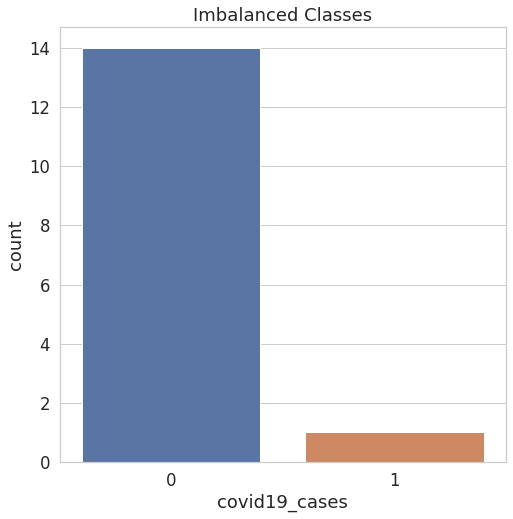

In [64]:



#plot the dataset after the undersampling
normalized_df= clean_tweets_ncw
plt.figure(figsize=(8, 8))
sns.countplot('covid19_cases', data=normalized_df)
plt.title('Imbalanced Classes')
plt.show()

In [74]:
# Using a Pandas dataframe, 'data,' where a column "category" either 
# has the "majority" option or the "minority" option within the column

minority = clean_tweets_ncw[clean_tweets_ncw["covid19_cases"] == "minority"]
majority = clean_tweets_ncw[clean_tweets_ncw["covid19_cases"] == "majority"].sample(n=len(minority))

In [75]:
# Import the logistic regression package from sci-kit learn
from sklearn.linear_model import LogisticRegression

# Start the instance of the Logistic Regression, but balanced
# Default for class_weight is None, which gives all classes a weight of 1
logreg = LogisticRegression(class_weight='balanced') 

In [92]:
X = np.array(clean_tweets_ncw[['cases']]) # Storing into X the 'Engine HP' as np.array
y = np.array(clean_tweets_ncw[['cases']]) # Storing into y the 'MSRP' as np.array
print(X.shape) # Vewing the shape of X
print(y.shape) # Vewing the shape of y

(15, 1)
(15, 1)


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
random_state=42) 

In [87]:
import numpy as np
e  = np.array(['coronavirus', 'covid_19'])
print(e)
e.reshape(-1,1)

['coronavirus' 'covid_19']


array([['coronavirus'],
       ['covid_19']], dtype='<U11')

In [88]:
# Import the SMOTE package from the imblearn library
from imblearn.over_sampling import SMOTE



# Start your SMOTE instance
smote = SMOTE()
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Apply SMOTE to your data, some previously defined X and y
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train) 
oversampler=SMOTE(kind='regular',k_neighbors=2)

# Look at your new, resampled value counts - should be equal!
#print(pd.Series(y).value_counts())

**Oversampling using SMOTE**

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


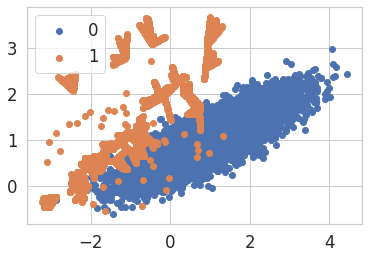

In [91]:
# borderline-SMOTE with SVM for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

**KNN**

In [94]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [95]:
clean_tweets_ncw.drop_duplicates()

,cases,covid19_19,covid19_cases,covid19_china,covid19_corona,covid19_covid,covid19_covid19,covid19_crosses,covid19_deaths,covid19_indias,covid19_lakh,covid19_million,covid19_new,covid19_tally,covid19_updates,covid19_vaccine
0,554,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,413,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,231,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,127,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,125,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,103,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,88,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,80,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,79,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#standardScaler = StandardScaler()
#columns_to_scale = ['cases', 'covid19_cases', 'covid19_deaths' , 'covid19_new']
#clean_tweets_ncw[columns_to_scale] = standardScaler.fit_transform(clean_tweets_ncw[columns_to_scale])

In [176]:
clean_tweets_nsw.head()

,words,count
0,covid19,554
1,india,485
2,coronavirus,460
3,cases,413
4,covid,231


In [189]:

X = clean_tweets_ncw.iloc[:, :-1].values
#X=np.asarray(clean_tweets_ncw['cases'], dtype="|S6")
y = np.asarray(clean_tweets_ncw['cases'], dtype="|S2")
#y= clean_tweets_ncw.iloc[:, 4].values

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
random_state=42) 

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Predictions and Evaluations**

In [108]:
pred =  knn.predict(X_test)

In [109]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[4 1]
 [0 0]]


In [110]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        b'0'       1.00      0.80      0.89         5
        b'1'       0.00      0.00      0.00         0

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5



**Choosing a K Value**

Let’s go ahead and use the elbow method to pick a good K Value. We will basically check the error rate for k=1 to say k=40. For every value of k we will call KNN classifier and then choose the value of k which has the least error rate.

In [111]:
error_rate = []
# Might take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Let’s plot a Line graph of the error rate.

Text(0, 0.5, 'Error Rate')

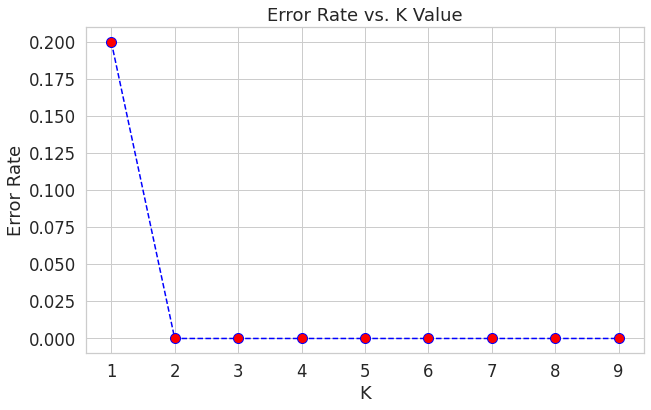

In [112]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [139]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [140]:
data = pd.get_dummies(clean_tweets_ncw)
data.iloc[0]

cases              554
covid19_19           0
covid19_cases        0
covid19_china        0
covid19_corona       0
covid19_covid        0
covid19_covid19      1
covid19_crosses      0
covid19_deaths       0
covid19_indias       0
covid19_lakh         0
covid19_million      0
covid19_new          0
covid19_tally        0
covid19_updates      0
covid19_vaccine      0
Name: 0, dtype: int64

In [141]:
data.covid19_cases.value_counts()

0    14
1     1
Name: covid19_cases, dtype: int64

In [143]:
data = data[~data.cases.isnull()]

**Random Forest**

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
random_state=42) 

In [191]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
clf=RandomForestClassifier(random_state=56)

In [193]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=56, verbose=0,
                       warm_start=False)

In [194]:
clf.score(X_train,y_train)

1.0

In [195]:
test_predict=clf.predict(X_test)

In [196]:
from sklearn.metrics import accuracy_score

In [197]:
accuracy_score(test_predict,y_test)

0.0

In [198]:
from sklearn.metrics import precision_score, f1_score, classification_report

In [203]:
#precision_score(test_predict,y_test)
print("Precision Score : ",precision_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.0


In [205]:
#recall_score(test_predict,y_test)
print("Recall Score : ",recall_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.0


In [207]:
print("F1 Score : ",f1_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

F1 Score :  0.0


**Naive Bayes**

In [129]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB

In [130]:
gnb = BernoulliNB()

In [131]:
gnb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [132]:
test_predict=gnb.predict(X_test)

In [133]:
accuracy_score(test_predict,y_test)

1.0

In [134]:
precision_score(test_predict,y_test)

0.0

In [135]:
recall_score(test_predict,y_test)

0.0

In [136]:
f1_score(test_predict,y_test)

0.0

**Decision Tree Classifier**

In [1]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [2]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [208]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [209]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.2

In [211]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix( test_predict,y_test)
)

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,1,0,0,1,1,1,0


In [214]:
print("Precision Score : ",precision_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.0


In [215]:
print("Recall Score : ",recall_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

Recall Score :  0.0


In [216]:
print("f1 Score : ",f1_score(test_predict, y_test, 
                                           pos_label='positive',
                                           average='micro'))

f1 Score :  0.0
